In [213]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
from sklearn.model_selection import train_test_split

In [214]:
import json

In [215]:
!python3 -m pip install s3fs

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [216]:
#from skafossdk import Skafos

In [217]:
import s3fs
fs = s3fs.S3FileSystem(anon=True)
data = []
with fs.open('s3://perfect.timing/sample-full.txt', 'rb') as f:
    for line in f:
        data.append(json.loads(line))

In [218]:
# data = []
# with open('perfect-timing/sample_data.txt') as training_data:
#     for line in training_data:
#         data.append(json.loads(line))
#         d = json.load(training_data)
#         print(d)
#         df = pd.DataFrame.from_records(d)

In [219]:
p = data[:4]

In [220]:
p

[{},
 {'XjpfnxGVvaM3CZgb-2': {'boss': 2263,
   'bossPercentage': 0,
   'difficulty': 5,
   'end_time': 981656,
   'fightPercentage': 0,
   'id': 2,
   'kill': True,
   'lastPhaseForPercentageDisplay': 0,
   'name': 'Grong',
   'partial': 3,
   'periods': [{'agg-damage-done': 11924974,
     'agg-damage-taken': 2314144,
     'agg-healing': 2335781,
     'damage-done': 11924974,
     'damage-taken': 2314144,
     'healing': 2335781,
     'period': 0},
    {'agg-damage-done': 21982910,
     'agg-damage-taken': 10293950,
     'agg-healing': 8839993,
     'damage-done': 10057936,
     'damage-taken': 7979806,
     'healing': 6504212,
     'period': 1},
    {'agg-damage-done': 31006777,
     'agg-damage-taken': 18581568,
     'agg-healing': 17478774,
     'damage-done': 9023867,
     'damage-taken': 8287618,
     'healing': 8638781,
     'period': 3},
    {'agg-damage-done': 39700848,
     'agg-damage-taken': 28251426,
     'agg-healing': 25722796,
     'damage-done': 8694071,
     'damage-ta

In [221]:
# XjpfnxGVvaM3CZgb.json
[
    {'fight_id': 2, 'prediction': .30}
]

[{'fight_id': 2, 'prediction': 0.3}]

In [222]:
training_data = []
for d in data:
    if d:
        for raid_id, v in d.items():
            if v and v['boss'] == 2263 and v['periods']:
                for ps in v['periods']:
                    period = ps['period']
                    if period == 45:
                        ps['raid_id'] = raid_id
                        ps['kill'] = v['kill']
                        training_data.append(ps)

In [223]:
len(training_data)

1622

In [224]:
# raid_ids

In [225]:
df = pd.DataFrame.from_records(training_data)
df.head()

,agg-damage-done,agg-damage-taken,agg-healing,damage-done,damage-taken,healing,kill,period,raid_id
0,93426412,67305749,68303581,2714917,1566388,1518684,True,45,k9dZqfa83KN16YyV-1
1,100424904,69599024,67752829,4064475,2066718,3183503,True,45,RaYP2dt9kAqjWgHM-1
2,93778335,66681051,66655250,2155607,1322650,1101291,True,45,AwJQTBbgZXRjdcvC-9
3,98120931,61950884,61600690,2073248,1062430,1643169,True,45,pyzVTQBbXwD1ZRfk-6
4,96286758,68752561,67285032,6794209,4018154,4189925,True,45,AdNtcpz4bJ1FG973-4


In [226]:
raid_ids = df['raid_id'].values

In [227]:
import math

def get_log(df, feature):
    log_feature_name = feature + '_log'
    df[log_feature_name] = np.log(df[feature] + .1)
    return(df)

In [228]:
features = ['damage-done', 'damage-taken', 'healing']

# for feature in features:
#     get_log(df, feature)
  
# df = df.drop(columns=features)
df.head()

,agg-damage-done,agg-damage-taken,agg-healing,damage-done,damage-taken,healing,kill,period,raid_id
0,93426412,67305749,68303581,2714917,1566388,1518684,True,45,k9dZqfa83KN16YyV-1
1,100424904,69599024,67752829,4064475,2066718,3183503,True,45,RaYP2dt9kAqjWgHM-1
2,93778335,66681051,66655250,2155607,1322650,1101291,True,45,AwJQTBbgZXRjdcvC-9
3,98120931,61950884,61600690,2073248,1062430,1643169,True,45,pyzVTQBbXwD1ZRfk-6
4,96286758,68752561,67285032,6794209,4018154,4189925,True,45,AdNtcpz4bJ1FG973-4


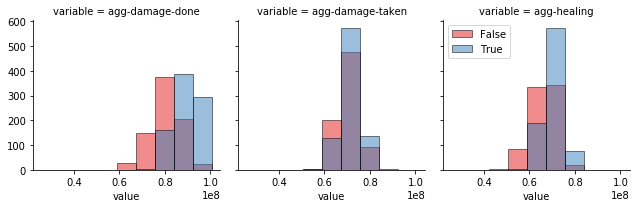

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

#for feature in features:

feature_list = list(df.drop(columns=['kill', 'period', 'raid_id']))

df2 = pd.melt(df, id_vars='kill', value_vars=feature_list[:3], value_name='value')
df2.head()

bins=np.linspace(df2.value.min(), df2.value.max(), 10)
g = sns.FacetGrid(df2, col="variable", hue="kill", palette="Set1", col_wrap=3)
g.map(plt.hist, 'value', bins=bins, ec="k", alpha=.5)

g.axes[-1].legend()
plt.show()

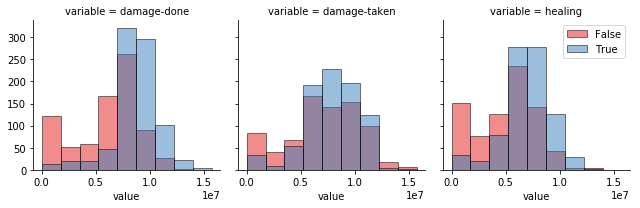

In [230]:
df2 = pd.melt(df, id_vars='kill', value_vars=feature_list[3:], value_name='value')
df2.head()

bins=np.linspace(df2.value.min(), df2.value.max(), 10)
g = sns.FacetGrid(df2, col="variable", hue="kill", palette="Set1", col_wrap=3)
g.map(plt.hist, 'value', bins=bins, ec="k", alpha=.5)

g.axes[-1].legend()
plt.show()

In [231]:
df.count()

agg-damage-done     1622
agg-damage-taken    1622
agg-healing         1622
damage-done         1622
damage-taken        1622
healing             1622
kill                1622
period              1622
raid_id             1622
dtype: int64

In [232]:
df.groupby('kill').count()

,agg-damage-done,agg-damage-taken,agg-healing,damage-done,damage-taken,healing,period,raid_id
kill,,,,,,,,
False,779,779,779,779,779,779,779,779
True,843,843,843,843,843,843,843,843


In [233]:
df.groupby('kill').head(10)

,agg-damage-done,agg-damage-taken,agg-healing,damage-done,damage-taken,healing,kill,period,raid_id
0,93426412,67305749,68303581,2714917,1566388,1518684,True,45,k9dZqfa83KN16YyV-1
1,100424904,69599024,67752829,4064475,2066718,3183503,True,45,RaYP2dt9kAqjWgHM-1
2,93778335,66681051,66655250,2155607,1322650,1101291,True,45,AwJQTBbgZXRjdcvC-9
3,98120931,61950884,61600690,2073248,1062430,1643169,True,45,pyzVTQBbXwD1ZRfk-6
4,96286758,68752561,67285032,6794209,4018154,4189925,True,45,AdNtcpz4bJ1FG973-4
5,93312134,61099092,60233579,1521464,549939,1048890,True,45,px1MJ6P4tWyN7qYv-12
6,84451860,77906501,74939279,7847490,9519949,8573999,False,45,7hKMbW2fAyZVPpGa-8
7,91796775,73676354,75142753,9306422,5836807,6026936,True,45,7hKMbW2fAyZVPpGa-9
8,96644735,73213709,68203955,9430159,9599086,6458460,True,45,xrBVAfZm8WXzFkKN-8
9,87100261,74830852,70132431,7007400,10071873,6837922,True,45,9KHLBt8j4wYFbacC-3


In [236]:
df.describe()

,agg-damage-done,agg-damage-taken,agg-healing,damage-done,damage-taken,healing,period
count,1.622000e+03,1.622000e+03,1.622000e+03,1.622000e+03,1.622000e+03,1.622000e+03,1622.0
mean,8.478863e+07,7.086489e+07,6.821677e+07,7.383993e+06,7.475322e+06,5.969632e+06,45.0
std,7.693935e+06,4.685489e+06,5.322746e+06,2.897475e+06,2.971384e+06,2.679903e+06,0.0
min,2.579531e+07,3.109712e+07,3.071551e+07,0.000000e+00,0.000000e+00,0.000000e+00,45.0
25%,7.984762e+07,6.790374e+07,6.528759e+07,6.449178e+06,5.924736e+06,4.770566e+06,45.0
50%,8.510732e+07,7.093074e+07,6.872046e+07,8.055533e+06,7.596458e+06,6.375027e+06,45.0
75%,9.077016e+07,7.393528e+07,7.176758e+07,9.121399e+06,9.768987e+06,7.674355e+06,45.0
max,1.005437e+08,8.567274e+07,8.436061e+07,1.490588e+07,1.571885e+07,1.352075e+07,45.0


In [237]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=['kill', 'raid_id', 'period']), 
    df.kill, 
    stratify=df.kill)


In [238]:
#x_train

In [239]:
# y_train

In [240]:
# x_test

In [241]:
# y_test

## Random Forest for feature selection

In [242]:
# !pip install matplotlib

In [243]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

In [244]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [245]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [246]:
# x_train

Feature ranking:
1. feature 0 (0.309783) agg-damage-done
2. feature 3 (0.185318) agg-damage-taken
3. feature 5 (0.149909) agg-healing
4. feature 2 (0.133311) damage-done
5. feature 4 (0.118472) damage-taken
6. feature 1 (0.103207) healing


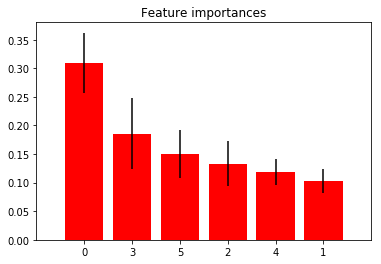

In [247]:
# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), list(df)[f])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

## Correlation analysis, features correlated with one another, some can be discarded. Correlation with outcome will be preferred

## Linear Regression model

In [248]:
x_test.shape

(406, 6)

In [249]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [250]:
# predictions

In [251]:
predictions = lr.predict(x_test)
#for x in predictions:
#    print(x)
pred_df = pd.DataFrame(predictions, y_test)
pred_df
# y_scores = [p[1] for p in lr.predict_proba(x_test)]
# y_scores

,0
kill,
True,True
True,True
True,True
False,True
True,True
False,False
True,True
False,True
True,True


In [252]:
lr.score(x_test, y_test)

0.8448275862068966

## Random Forest Model

In [253]:
from sklearn.ensemble import RandomForestClassifier